In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os


In [3]:
df = pd.read_csv('data/diabetic_data.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [20]:
df.describe(include=[np.number]).T
df.median(numeric_only=True)

race                          2.0
gender                        0.0
age                           6.0
admission_type_id             1.0
discharge_disposition_id      1.0
admission_source_id           7.0
time_in_hospital              4.0
num_lab_procedures           44.0
num_procedures                1.0
num_medications              15.0
number_outpatient             0.0
number_emergency              0.0
number_inpatient              0.0
diag_1                      300.0
diag_2                      258.0
diag_3                      256.0
number_diagnoses              8.0
metformin                     1.0
repaglinide                   1.0
nateglinide                   1.0
chlorpropamide                1.0
glimepiride                   1.0
acetohexamide                 0.0
glipizide                     1.0
glyburide                     1.0
tolbutamide                   0.0
pioglitazone                  1.0
rosiglitazone                 1.0
acarbose                      1.0
miglitol      

In [5]:
df.replace('?', np.nan, inplace=True)
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Drop columns with too many missing values (if any)
df.dropna(thresh=len(df)*0.8, axis=1, inplace=True)

# Fill remaining NaNs or drop rows
df.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'readmitted':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [13]:
print(df['readmitted'].unique())


['>30' 'NO' '<30']


In [14]:
# Create a binary target: 1 if readmitted in less than 30 days, else 0
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Confirm creation
print(df[['readmitted', 'readmitted_binary']].head())


  readmitted  readmitted_binary
1        >30                  0
2         NO                  0
3         NO                  0
4         NO                  0
5        >30                  0


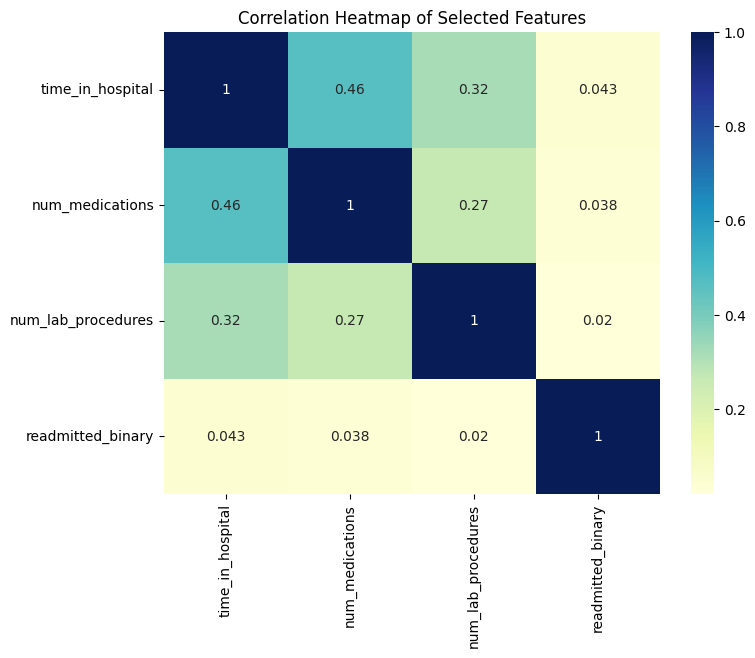

In [15]:
# Select specific features to analyze
selected_cols = ['time_in_hospital', 'num_medications', 'num_lab_procedures', 'readmitted_binary']

# Compute correlation matrix for the selected features
corr_selected = df[selected_cols].corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_selected, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap of Selected Features")
plt.savefig("Visuals/selected_feature_correlation.png")
plt.show()


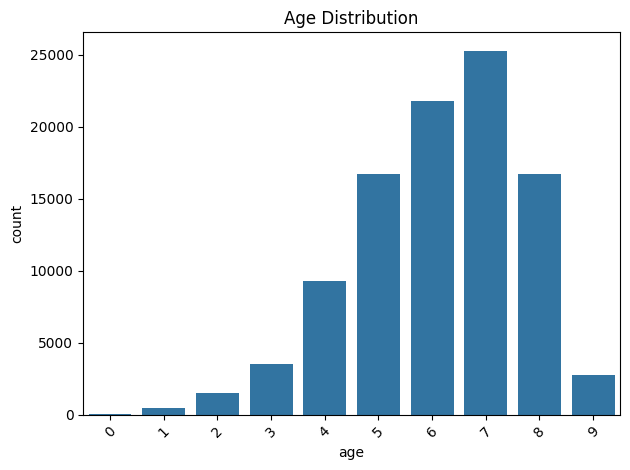

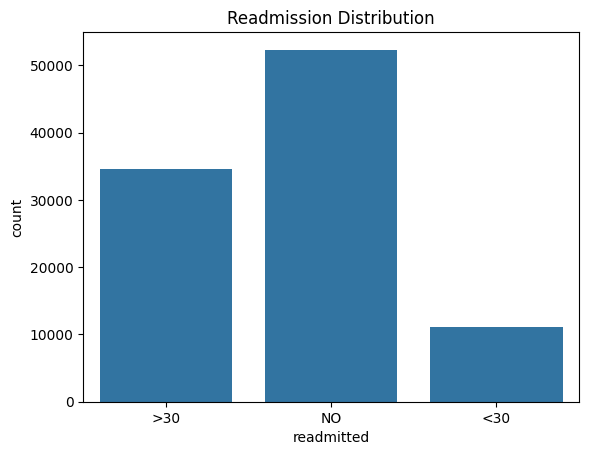

In [16]:
sns.countplot(x='age', data=df)
plt.title("Age Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visuals/age_distribution.png")
plt.show()

sns.countplot(x='readmitted', data=df)
plt.title("Readmission Distribution")
plt.savefig("Visuals/readmission_distribution.png")
plt.show()


In [17]:
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [18]:
X = df.drop(['readmitted', 'readmitted_binary'], axis=1)
y = df['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You can try both
model = RandomForestClassifier(random_state=42)
# model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.888022028453419
Precision: 0.6206896551724138
Recall: 0.008170676350431231
F1 Score: 0.016129032258064516

Confusion Matrix:
 [[17397    11]
 [ 2185    18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17408
           1       0.62      0.01      0.02      2203

    accuracy                           0.89     19611
   macro avg       0.75      0.50      0.48     19611
weighted avg       0.86      0.89      0.84     19611

